In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('test_datac.csv')

In [3]:
test.head()

,row_id,ts_start,lat,lon,ts_valid,temp,dewpt,slp,rh,vis,...,FE_SUN_ALTITUDE,DT_DATA_LAST_UPDATED,SURF_UNIQUE_ID,site_id,anonym_0,anonym_1,anonym_2,anonym_3,anonym_4,anonym_5
0,39062,2019-11-19 04:45:00+00:00,41.02,-92.42,2019-11-19 05:00:00+00:00,5.0,4.0,1005.90,93.0,7.0,...,-63.667340,2019-11-19 04:45:00+00:00,5120360.0,54,0.479819,0.457492,0.715955,-1.974396,-2.088368,-1.184501
1,42462,2019-11-19 04:45:00+00:00,42.07,-90.68,2019-11-19 05:00:00+00:00,1.0,-1.0,1007.05,85.0,7.0,...,-63.624064,2019-11-19 04:45:00+00:00,5120281.0,39,0.630652,0.829738,0.682391,-1.459596,-1.254026,-1.225418
2,42461,2019-11-19 04:45:00+00:00,42.07,-90.68,2019-11-19 05:00:00+00:00,1.0,-1.0,1007.05,85.0,7.0,...,-63.624064,2019-11-19 04:45:00+00:00,5120280.0,39,0.610518,0.694695,0.692086,-1.385336,-1.286704,-1.075082
3,45685,2019-11-19 04:45:00+00:00,41.96,-92.30,2019-11-19 05:00:00+00:00,3.0,2.0,1005.80,96.0,4.5,...,-62.993589,2019-11-19 04:45:00+00:00,5120570.0,13,0.581700,0.471643,0.817873,-1.674626,-1.729747,-0.648543
4,45686,2019-11-19 04:45:00+00:00,41.96,-92.30,2019-11-19 05:00:00+00:00,3.0,2.0,1005.80,96.0,4.5,...,-62.993589,2019-11-19 04:45:00+00:00,5120571.0,13,0.489562,0.540767,1.007763,-1.653722,-1.813574,-0.595717


In [4]:
test.columns

Index(['row_id', 'ts_start', 'lat', 'lon', 'ts_valid', 'temp', 'dewpt', 'slp',
       'rh', 'vis', 'wspeed', 'wdir', 'wgust', 'pop', 'precip_rate',
       'FE_AZIMUTH', 'FE_ZENITH', 'FE_ASCENSION', 'FE_DECLINATION',
       'FE_HEIGHT', 'FE_SUN_ALTITUDE', 'DT_DATA_LAST_UPDATED',
       'SURF_UNIQUE_ID', 'site_id', 'anonym_0', 'anonym_1', 'anonym_2',
       'anonym_3', 'anonym_4', 'anonym_5'],
      dtype='object')

In [5]:
test.nunique()

row_id                  53616
ts_start                 1996
lat                         9
lon                         9
ts_valid                 1996
temp                       33
dewpt                      32
slp                      3853
rh                         68
vis                        61
wspeed                     55
wdir                      360
wgust                      55
pop                        96
precip_rate               231
FE_AZIMUTH              17396
FE_ZENITH               17396
FE_ASCENSION            17396
FE_DECLINATION          17396
FE_HEIGHT               17396
FE_SUN_ALTITUDE         17396
DT_DATA_LAST_UPDATED     1996
SURF_UNIQUE_ID             28
site_id                     9
anonym_0                53616
anonym_1                53616
anonym_2                53616
anonym_3                53574
anonym_4                53602
anonym_5                33555
dtype: int64

In [6]:
uni_col = {'FE_AZIMUTH', 'FE_ZENITH',
           'FE_ASCENSION', 'FE_DECLINATION', 'FE_HEIGHT', 'FE_SUN_ALTITUDE', 
           'anonym_0', 'anonym_1', 'anonym_2','anonym_3', 'anonym_4', 'anonym_5'}

In [7]:
row_id = test['row_id']

In [8]:
row_id

0        39062
1        42462
2        42461
3        45685
4        45686
         ...  
53611    18020
53612    18021
53613    11978
53614     8525
53615     8527
Name: row_id, Length: 53616, dtype: int64

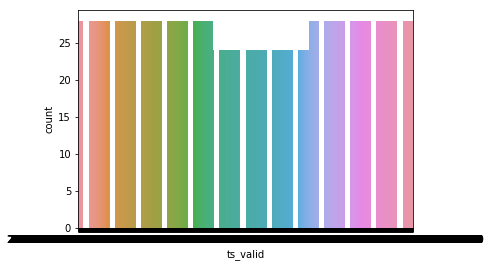

In [9]:
sns.countplot(x= 'ts_valid',data = test)

In [10]:
corr = test.corr()

In [11]:
corr

,row_id,lat,lon,temp,dewpt,slp,rh,vis,wspeed,wdir,...,FE_HEIGHT,FE_SUN_ALTITUDE,SURF_UNIQUE_ID,site_id,anonym_0,anonym_1,anonym_2,anonym_3,anonym_4,anonym_5
row_id,1.000000,-0.012863,0.079970,0.149274,0.231229,-0.055085,0.094153,-0.168600,-0.001308,-0.200546,...,0.055048,0.020112,0.008539,-0.083451,-0.109661,-0.139215,0.132309,-0.124313,-0.213653,0.120023
lat,-0.012863,1.000000,0.084770,-0.129969,-0.052734,-0.024359,0.148111,-0.109203,-0.010406,-0.010922,...,0.000038,-0.003976,0.243511,-0.374792,0.086851,0.037983,0.085031,0.134717,0.050616,0.073580
lon,0.079970,0.084770,1.000000,0.092105,0.087758,-0.058935,-0.064600,-0.051731,-0.016329,0.005476,...,0.015749,-0.001637,-0.555272,-0.238076,-0.070667,-0.057329,0.030748,-0.031336,-0.066118,0.026488
temp,0.149274,-0.129969,0.092105,1.000000,0.826573,-0.469901,-0.496517,-0.006226,0.134754,-0.073508,...,-0.060731,0.293330,-0.107197,0.035746,-0.650660,-0.513896,0.003881,-0.935682,-0.763011,0.148437
dewpt,0.231229,-0.052734,0.087758,0.826573,1.000000,-0.565636,0.064067,-0.358827,0.140567,-0.211660,...,0.028521,0.079774,-0.028707,-0.004458,-0.551785,-0.616049,0.271872,-0.716330,-0.945102,0.358515
slp,-0.055085,-0.024359,-0.058935,-0.469901,-0.565636,1.000000,-0.048299,0.289312,-0.193214,-0.039877,...,-0.001281,0.002398,0.025695,0.020016,0.311308,0.342699,-0.224399,0.397735,0.518818,-0.295687
rh,0.094153,0.148111,-0.064600,-0.496517,0.064067,-0.048299,1.000000,-0.574547,-0.026341,-0.206005,...,0.152008,-0.404320,0.177957,-0.067167,0.305541,-0.031710,0.438756,0.527448,-0.089645,0.558321
vis,-0.168600,-0.109203,-0.051731,-0.006226,-0.358827,0.289312,-0.574547,1.000000,0.037780,0.297195,...,-0.019747,0.278399,-0.015996,0.045854,0.019003,0.214554,-0.821493,-0.046039,0.344066,-0.938153
wspeed,-0.001308,-0.010406,-0.016329,0.134754,0.140567,-0.193214,-0.026341,0.037780,1.000000,0.196944,...,0.068626,0.230660,-0.009529,0.006100,-0.082345,-0.072762,-0.010879,-0.140331,-0.168589,-0.023252
wdir,-0.200546,-0.010922,0.005476,-0.073508,-0.211660,-0.039877,-0.206005,0.297195,0.196944,1.000000,...,-0.040699,0.032128,-0.011467,-0.008383,0.053099,0.128239,-0.238446,0.050198,0.184944,-0.353589


In [12]:
test['wgust'].describe()

count    24738.000000
mean        41.038605
std         10.363347
min         26.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         80.000000
Name: wgust, dtype: float64

In [13]:
test['wgust'] = test['wgust'].fillna(test['wgust'].mean())

In [14]:
test.dtypes

row_id                    int64
ts_start                 object
lat                     float64
lon                     float64
ts_valid                 object
temp                    float64
dewpt                   float64
slp                     float64
rh                      float64
vis                     float64
wspeed                  float64
wdir                    float64
wgust                   float64
pop                     float64
precip_rate             float64
FE_AZIMUTH              float64
FE_ZENITH               float64
FE_ASCENSION            float64
FE_DECLINATION          float64
FE_HEIGHT               float64
FE_SUN_ALTITUDE         float64
DT_DATA_LAST_UPDATED     object
SURF_UNIQUE_ID          float64
site_id                   int64
anonym_0                float64
anonym_1                float64
anonym_2                float64
anonym_3                float64
anonym_4                float64
anonym_5                float64
dtype: object

In [15]:
test = test.set_index('ts_start')

In [16]:
test = test.drop(['DT_DATA_LAST_UPDATED'],axis=1)

In [17]:
test_copy = test

In [149]:
test = test_copy

In [150]:
test = test.drop(['ts_valid'],axis=1)

In [151]:
test = test.drop(['row_id'],axis=1)

In [152]:
test = test[uni_col]

In [153]:
test.head()

,anonym_1,anonym_0,anonym_5,FE_ZENITH,FE_HEIGHT,FE_ASCENSION,FE_SUN_ALTITUDE,FE_AZIMUTH,anonym_3,anonym_4,FE_DECLINATION,anonym_2
ts_start,,,,,,,,,,,,
2019-11-19 04:45:00+00:00,0.457492,0.479819,-1.184501,153.667340,162.551725,233.947649,-63.667340,320.369888,-1.974396,-2.088368,-19.289585,0.715955
2019-11-19 04:45:00+00:00,0.829738,0.630652,-1.225418,153.624064,164.291190,233.948183,-63.624064,324.896594,-1.459596,-1.254026,-19.290761,0.682391
2019-11-19 04:45:00+00:00,0.694695,0.610518,-1.075082,153.624064,164.291190,233.948183,-63.624064,324.896594,-1.385336,-1.286704,-19.290761,0.692086
2019-11-19 04:45:00+00:00,0.471643,0.581700,-0.648543,152.993589,162.671293,233.948080,-62.993589,321.762222,-1.674626,-1.729747,-19.290701,0.817873
2019-11-19 04:45:00+00:00,0.540767,0.489562,-0.595717,152.993589,162.671293,233.948080,-62.993589,321.762222,-1.653722,-1.813574,-19.290701,1.007763


In [154]:
test.isnull().sum()

anonym_1           0
anonym_0           0
anonym_5           0
FE_ZENITH          0
FE_HEIGHT          0
FE_ASCENSION       0
FE_SUN_ALTITUDE    0
FE_AZIMUTH         0
anonym_3           0
anonym_4           0
FE_DECLINATION     0
anonym_2           0
dtype: int64

In [24]:
df = pd.read_csv('train_data.csv')

In [25]:
df = df.set_index('ts_start')

In [26]:
df.columns

Index(['lat', 'lon', 'ts_valid', 'temp', 'dewpt', 'slp', 'rh', 'vis', 'wspeed',
       'wdir', 'wgust', 'pop', 'precip_rate', 'FE_AZIMUTH', 'FE_ZENITH',
       'FE_ASCENSION', 'FE_DECLINATION', 'FE_HEIGHT', 'FE_SUN_ALTITUDE',
       'DT_DATA_LAST_UPDATED', 'SURF_UNIQUE_ID', 'SURF_SURFACE_CONDITION',
       'site_id', 'anonym_0', 'anonym_1', 'anonym_2', 'anonym_3', 'anonym_4',
       'anonym_5'],
      dtype='object')

In [27]:
df['wgust'] = df['wgust'].fillna(df['wgust'].mean())

In [28]:
df = df.drop(['DT_DATA_LAST_UPDATED','ts_valid'],axis=1)

In [29]:
df_copy = df

In [129]:
df = df_copy

In [130]:
uni_col_df = {'FE_AZIMUTH', 'FE_ZENITH',
           'FE_ASCENSION', 'FE_DECLINATION', 'FE_HEIGHT', 'FE_SUN_ALTITUDE', 
           'anonym_0', 'anonym_1', 'anonym_2','anonym_3', 'anonym_4', 'anonym_5','SURF_SURFACE_CONDITION'}

In [131]:
df = df[uni_col_df]

In [132]:
df.head()

,anonym_1,anonym_0,anonym_5,FE_ZENITH,FE_HEIGHT,FE_ASCENSION,FE_SUN_ALTITUDE,FE_AZIMUTH,anonym_3,anonym_4,FE_DECLINATION,anonym_2,SURF_SURFACE_CONDITION
ts_start,,,,,,,,,,,,,
2019-11-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dry
2019-11-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dry
2019-11-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dry
2019-11-01 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dry
2019-11-01 05:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dry


In [133]:
df.isnull().sum()

anonym_1                   33597
anonym_0                   33597
anonym_5                   33597
FE_ZENITH                  33595
FE_HEIGHT                  33596
FE_ASCENSION               33596
FE_SUN_ALTITUDE            33596
FE_AZIMUTH                 33595
anonym_3                   33597
anonym_4                   33597
FE_DECLINATION             33596
anonym_2                   33597
SURF_SURFACE_CONDITION    178481
dtype: int64

In [134]:
df.dtypes

anonym_1                  float64
anonym_0                  float64
anonym_5                  float64
FE_ZENITH                 float64
FE_HEIGHT                 float64
FE_ASCENSION              float64
FE_SUN_ALTITUDE           float64
FE_AZIMUTH                float64
anonym_3                  float64
anonym_4                  float64
FE_DECLINATION            float64
anonym_2                  float64
SURF_SURFACE_CONDITION     object
dtype: object

In [135]:
df = df.dropna(axis=0)

In [136]:
obj_df = df.select_dtypes(include = ['object']).copy()
obj_df.head()

,SURF_SURFACE_CONDITION
ts_start,
2019-11-02 04:15:00+00:00,wet
2019-11-02 04:15:00+00:00,dry
2019-11-02 04:15:00+00:00,dry
2019-11-02 04:15:00+00:00,wet
2019-11-02 04:30:00+00:00,wet


In [137]:
obj_df["SURF_SURFACE_CONDITION"] = obj_df["SURF_SURFACE_CONDITION"].astype('category')
obj_df["SURF_SURFACE_CONDITION"] = obj_df["SURF_SURFACE_CONDITION"].cat.codes

In [138]:
obj_df = obj_df.rename(columns={'SURF_SURFACE_CONDITION':'Surface_Condition'})

In [139]:
df = pd.concat([df,obj_df],axis=1)

In [144]:
df.isnull().sum()

anonym_1                  0
anonym_0                  0
FE_ZENITH                 0
FE_HEIGHT                 0
FE_ASCENSION              0
FE_SUN_ALTITUDE           0
FE_AZIMUTH                0
anonym_3                  0
anonym_4                  0
FE_DECLINATION            0
anonym_2                  0
SURF_SURFACE_CONDITION    0
Surface_Condition         0
dtype: int64

In [141]:
df = df.replace([np.inf, -np.inf], np.nan)

In [142]:
df = df.drop(['anonym_5'],axis=1)

In [143]:
df = df.dropna(axis=0)

In [145]:
df = df.drop(['SURF_SURFACE_CONDITION'],axis=1)

In [183]:
X = df.drop(['Surface_Condition'],axis=1)

In [184]:
y = df['Surface_Condition']

In [185]:
test = test.drop(['anonym_5'],axis=1)

KeyError: "['anonym_5'] not found in axis"

In [156]:
test = test.replace([np.inf, -np.inf], np.nan)

In [157]:
test.isnull().sum()

anonym_1            0
anonym_0            0
FE_ZENITH           0
FE_HEIGHT           0
FE_ASCENSION        0
FE_SUN_ALTITUDE     0
FE_AZIMUTH          0
anonym_3           43
anonym_4           15
FE_DECLINATION      0
anonym_2            0
dtype: int64

In [158]:
test = test.dropna(axis=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

test = scaler.fit_transform(test)

X = pd.DataFrame(X)

X = X.rename(columns={0:'FE_AZIMUTH',1: 'FE_ZENITH',
           2:'FE_ASCENSION', 3:'FE_DECLINATION', 4:'FE_HEIGHT', 5:'FE_SUN_ALTITUDE', 
          6: 'anonym_0',7: 'anonym_1',8: 'anonym_2',9:'anonym_3',10: 'anonym_4'})

test = pd.DataFrame(test)

test = test.rename(columns={0:'FE_AZIMUTH',1: 'FE_ZENITH',
           2:'FE_ASCENSION', 3:'FE_DECLINATION', 4:'FE_HEIGHT', 5:'FE_SUN_ALTITUDE', 
          6: 'anonym_0',7: 'anonym_1',8: 'anonym_2',9:'anonym_3',10: 'anonym_4'})

y = y.iloc[:824395]

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_res, y_res = ros.fit_resample(X, y)

y_res = pd.DataFrame(y_res)

sns.countplot(x='Surface_Condition',data = y_res)

In [211]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier


In [212]:
clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=20,n_estimators=100,learning_rate=0.1))

In [ ]:
clf.fit(X_res, y_res)

In [ ]:
y_pred = clf.predict(test)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
prediction = y_pred
prediction = prediction.rename(columns={0:'SURF_SURFACE_CONDITION'})
prediction = prediction.replace(0,'dry')
prediction = prediction.replace(1,'icy')
prediction = prediction.replace(2,'wet')
sns.countplot(x='SURF_SURFACE_CONDITION',data=prediction)

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
clf = DecisionTreeClassifier(random_state=1)

In [206]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [207]:
y_pred = clf.predict(test)

In [208]:
y_pred = pd.DataFrame(y_pred)

In [209]:
prediction = y_pred
prediction = prediction.rename(columns={0:'SURF_SURFACE_CONDITION'})
prediction = prediction.replace(0,'dry')
prediction = prediction.replace(1,'icy')
prediction = prediction.replace(2,'wet')

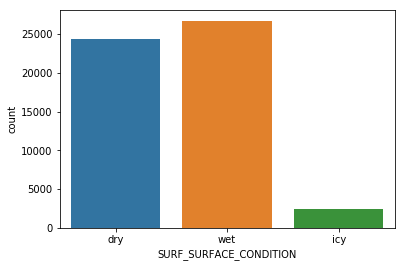

In [210]:
sns.countplot(x='SURF_SURFACE_CONDITION',data=prediction)

In [181]:
export_csv = prediction.to_csv(r'y_pred.csv',index=None,header=True)

In [182]:
export_csv = row_id.to_csv(r'row_id.csv',index=None,header=True)